# Setup

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

import scipy as sp
import scipy.stats as stats
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [96]:
'''data found at kaggle.com "Life Expectancy (WHO)"
https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?resource=download
'''
data = pd.read_csv('life_expectancy_data.csv')

# Data Cleaning

In [97]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [98]:
cols = ['country', 'year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'BMI', 'under_five_deaths',
       'polio', 'total_expenditure', 'diphtheria', 'HIV_AIDS', 'GDP', 'population', 'thinness_1_to_19_years',
       'thinness_5_to_9_years', 'income_composition_of_resources', 'schooling']
data.columns = cols
data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,HIV_AIDS,GDP,population,thinness_1_to_19_years,thinness_5_to_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [99]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
for c in data.columns:
    string_null = np.array([x in a[2:] for x in data[c]])
    print(c, data[c].isnull().sum(), string_null.sum()) 

country 0 0
year 0 0
status 0 0
life_expectancy 10 0
adult_mortality 10 0
infant_deaths 0 0
alcohol 194 0
percentage_expenditure 0 0
hepatitis_b 553 0
measles 0 0
BMI 34 0
under_five_deaths 0 0
polio 19 0
total_expenditure 226 0
diphtheria 19 0
HIV_AIDS 0 0
GDP 448 0
population 652 0
thinness_1_to_19_years 34 0
thinness_5_to_9_years 34 0
income_composition_of_resources 167 0
schooling 163 0


In [100]:
percentages = [i/1460 for i in data.isnull().sum()]
CCA = pd.DataFrame({'features': data.columns, 'percentage_missing': percentages})
impute = []
throw = []
for i in np.arange(len(CCA)):
    if CCA['percentage_missing'][i] > 0.1:
        throw.append(CCA['features'][i])
    elif CCA['percentage_missing'][i] > 0 and CCA['percentage_missing'][i] <= 0.05:
        impute.append(CCA['features'][i])
    else:
        continue


# Complete the codes below by uncommenting and changing the values of features_to_impute and features_to_throw. 
# Each should be a list of feature names (e.g. ['LotFrontage','Alley',...]). Do not change the variable names. 
# There are hidden tests which will grade above three questions.

features_to_impute = impute
features_to_throw = throw

print(len(features_to_impute), features_to_impute)
print(len(features_to_throw), features_to_throw)

7 ['life_expectancy', 'adult_mortality', 'BMI', 'polio', 'diphtheria', 'thinness_1_to_19_years', 'thinness_5_to_9_years']
7 ['alcohol', 'hepatitis_b', 'total_expenditure', 'GDP', 'population', 'income_composition_of_resources', 'schooling']


In [101]:
data = data.drop(features_to_throw, 1)

In [102]:
temp_df = data
impute_dict = {}
for i in features_to_impute:
    if temp_df[i].dtype == float:
        impute_dict[i] = temp_df[i].median()
    else:
        impute_dict[i] = temp_df[i].mode().iloc[0]
temp_df = temp_df.fillna(value=impute_dict)
data = temp_df
data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,measles,BMI,under_five_deaths,polio,diphtheria,HIV_AIDS,thinness_1_to_19_years,thinness_5_to_9_years
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3
1,Afghanistan,2014,Developing,59.9,271.0,64,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5
2,Afghanistan,2013,Developing,59.9,268.0,66,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7
3,Afghanistan,2012,Developing,59.5,272.0,69,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0
4,Afghanistan,2011,Developing,59.2,275.0,71,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2


# Exploratory Data Analysis

(array([  4.,  50., 134., 229., 277., 405., 590., 819., 362.,  68.]),
 array([36.3 , 41.57, 46.84, 52.11, 57.38, 62.65, 67.92, 73.19, 78.46,
        83.73, 89.  ]),
 <a list of 10 Patch objects>)

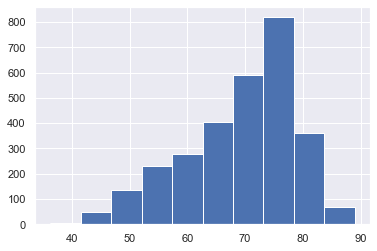

In [103]:
plt.hist(data['life_expectancy'])

(array([729., 775., 610., 423., 176., 117.,  54.,  24.,  17.,  13.]),
 array([  1. ,  73.2, 145.4, 217.6, 289.8, 362. , 434.2, 506.4, 578.6,
        650.8, 723. ]),
 <a list of 10 Patch objects>)

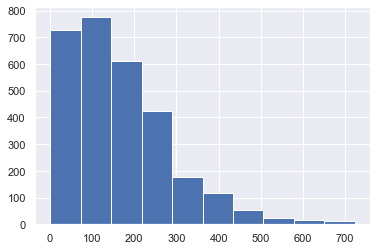

In [104]:
plt.hist(data['adult_mortality'])

(array([283., 361., 423., 214., 230., 399., 711., 282.,  30.,   5.]),
 array([ 1.  ,  9.63, 18.26, 26.89, 35.52, 44.15, 52.78, 61.41, 70.04,
        78.67, 87.3 ]),
 <a list of 10 Patch objects>)

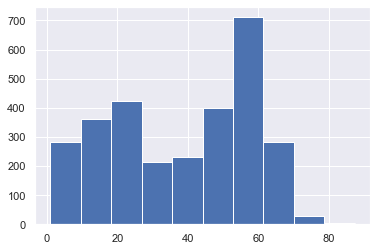

In [105]:
plt.hist(data['BMI'])

(array([ 170.,    3.,   22.,   35.,   68.,   59.,  150.,  272.,  470.,
        1689.]),
 array([ 2. , 11.7, 21.4, 31.1, 40.8, 50.5, 60.2, 69.9, 79.6, 89.3, 99. ]),
 <a list of 10 Patch objects>)

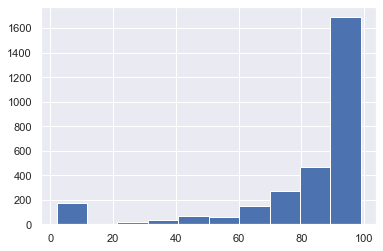

In [106]:
plt.hist(data['diphtheria'])

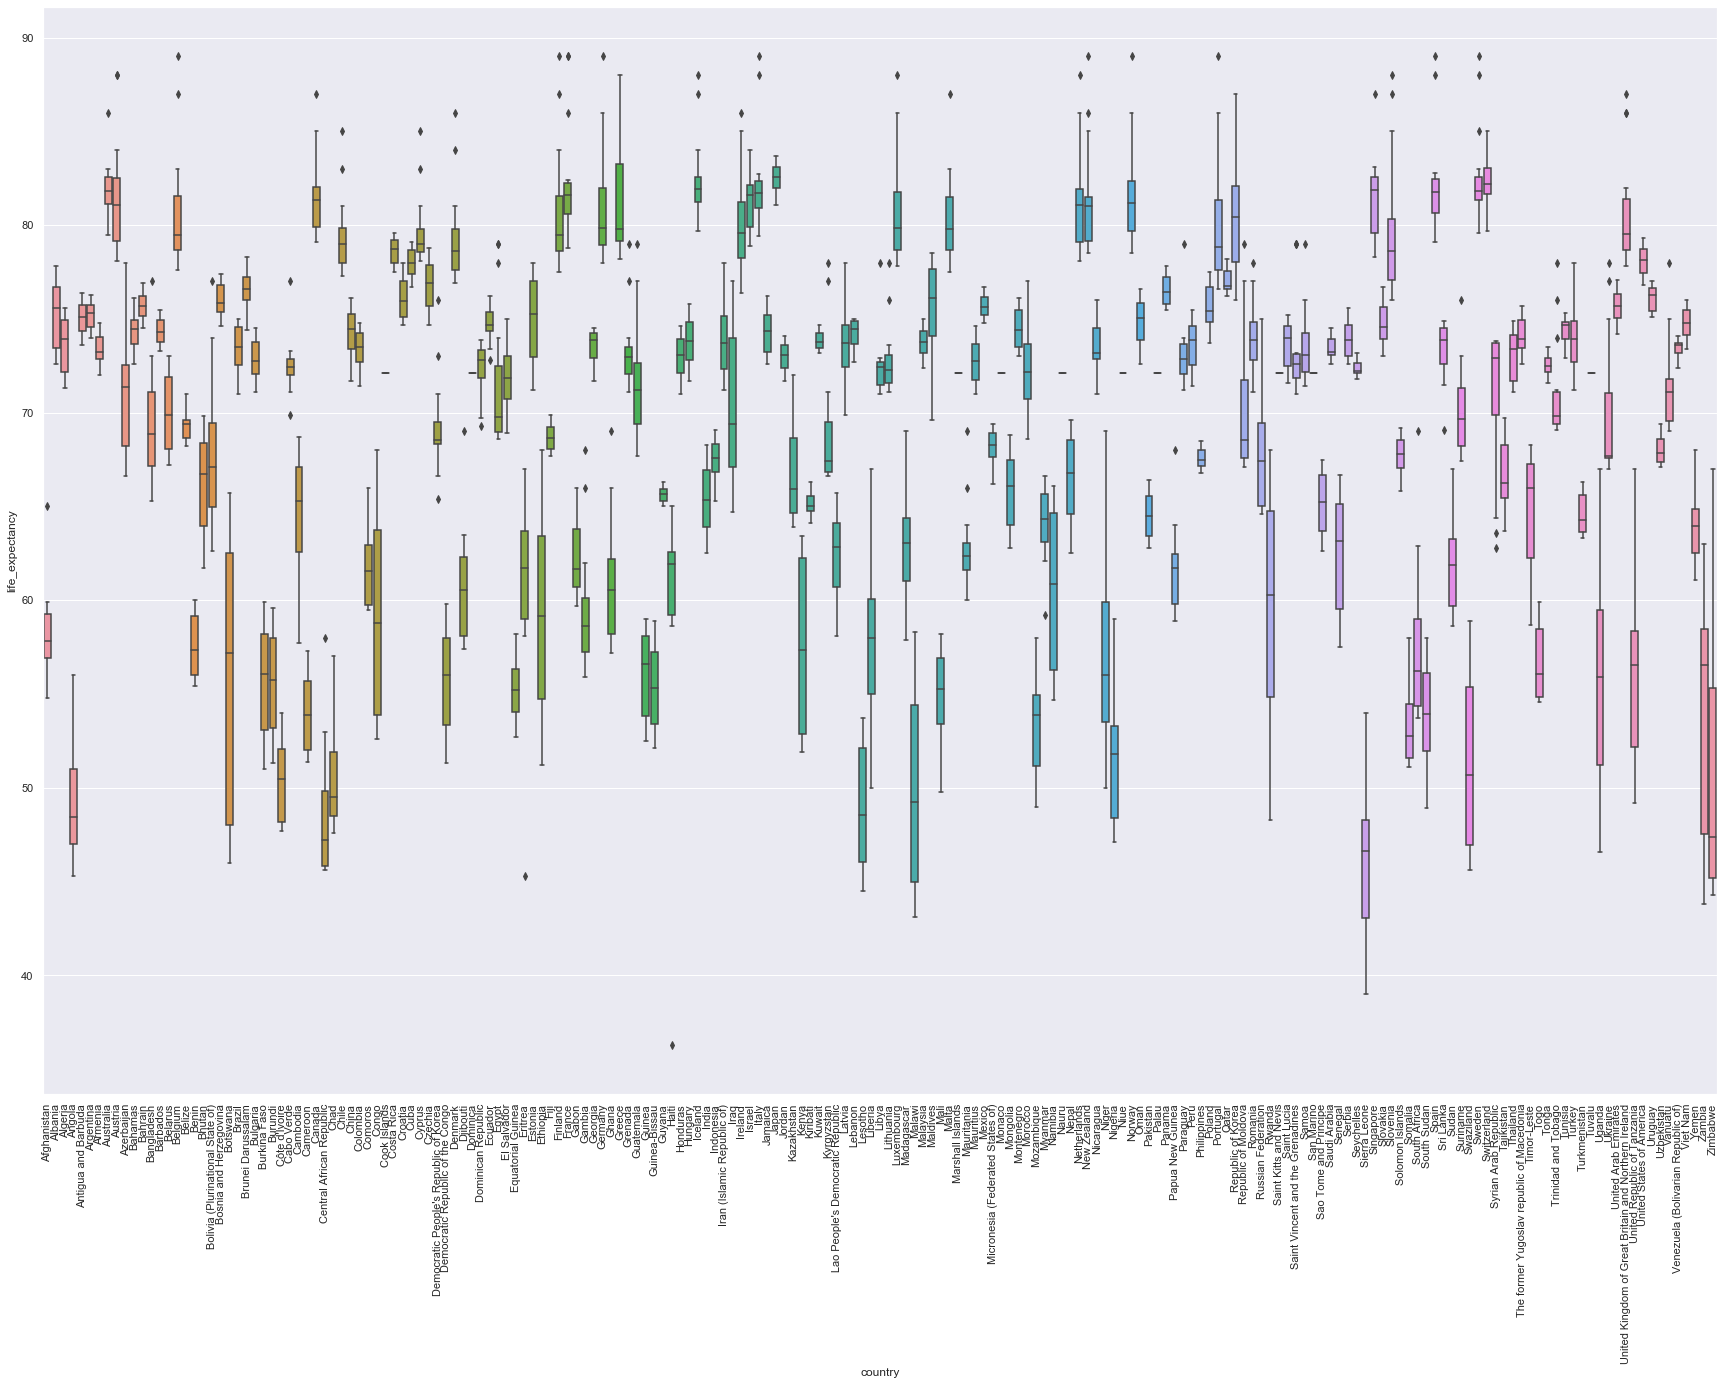

In [119]:
plt.figure(figsize=(30,20))
plt.xticks(rotation=90)
sns.boxplot(y='life_expectancy',x='country',data=data)

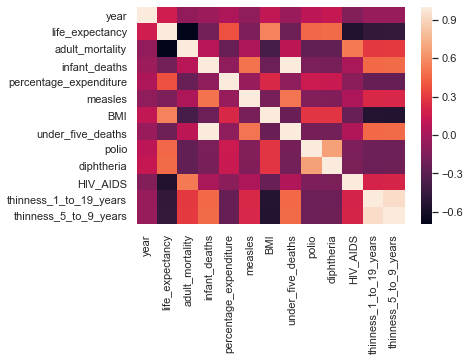

In [124]:
sns.heatmap(data.corr())

# Linear Regression

## Simple

In [108]:
from sklearn.model_selection import train_test_split
X = data
y = data['life_expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [110]:
r_squared = {}
for i in X_train.columns:
    mod = smf.ols(formula='life_expectancy ~' + str(i), data=X_train)
    res = mod.fit()
    r_squared[i] = res.rsquared_adj

r_squared = {k: v for k, v in sorted(r_squared.items(), key=lambda item: item[1])}
r_squared

{'measles': 0.025318540986593252,
 'year': 0.026878528356840903,
 'infant_deaths': 0.036826989264662324,
 'under_five_deaths': 0.047374063265171906,
 'percentage_expenditure': 0.14561408092118355,
 'polio': 0.1957433957075454,
 'diphtheria': 0.2158979147783462,
 'thinness_5_to_9_years': 0.22300084543693088,
 'thinness_1_to_19_years': 0.22811648602720325,
 'status': 0.2345772013545615,
 'HIV_AIDS': 0.30458430629551136,
 'BMI': 0.3166738339020281,
 'adult_mortality': 0.4902125435114596,
 'country': 0.9199459436751365,
 'life_expectancy': 1.0}

## Multiple

In [126]:
y = data['life_expectancy']
X = data[['year', 'adult_mortality', 'infant_deaths', 'percentage_expenditure', 'measles', 'BMI',
           'under_five_deaths', 'diphtheria', 'HIV_AIDS', 'thinness_1_to_19_years', 'thinness_5_to_9_years']]
X = sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     754.4
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:19:52   Log-Likelihood:                -8810.4
No. Observations:                2938   AIC:                         1.764e+04
Df Residuals:                    2926   BIC:                         1.772e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -113

In [128]:
y = data['life_expectancy']
X = data[['adult_mortality','thinness_1_to_19_years', 'thinness_5_to_9_years']]
X = sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     1248.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:05:39   Log-Likelihood:                -9577.1
No. Observations:                2938   AIC:                         1.916e+04
Df Residuals:                    2934   BIC:                         1.919e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     79

## Polynomial

In [127]:
data['adult_mortality_norm'] = data['adult_mortality']/data['adult_mortality'].mean()
# your code here
X = data
y = data['life_expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

running_string = 'life_expectancy ~ adult_mortality_norm'
for i in np.arange(2,21):
    running_string += ' + np.power(adult_mortality_norm,'+str(i)+')'
    mod = smf.ols(formula=running_string, data=X_train)
    res = mod.fit()
    print(str(i) + ' : ' + str(res.rsquared))

2 : 0.49193716431767087
3 : 0.5692938325517775
4 : 0.5946281196722973
5 : 0.5946621909434657
6 : 0.6011052555387206
7 : 0.611308773853815
8 : 0.6280577613186283
9 : 0.6472735241027582
10 : 0.6546820290399624
11 : 0.6547034949639421
12 : 0.6605546147782162
13 : 0.6846285839950164
14 : 0.7155454313295463
15 : 0.7359601457143119
16 : 0.7463385611974666
17 : 0.7367887909220315
18 : 0.7164770381591825
19 : 0.6664736603389467
20 : 0.6695909554613906


# Conclusion

This dataset has a variety of features, including but not limited to, country, disease, adult and infant mortality, and BMI. I chose to use a combination of these features to predict life expectancy using linear regression models.

Starting with data cleaning, I identified columns that had above a 10% missing value percentage, and imputed those that were missing below 10%. I upped the threshold from 5% to 10%, as more than half of the columns had more than 5% missing values. I also renamed the columns, as they were incosistent and often had spaces before and after the column names. 

In terms of exploratory data analysis, I chose to explore the distribution of a few of the continuous variables, and also used a boxplot for some insight into the distribution of the life expectancy of each country. Finally, I ended with a correlation matrix to see what features may be the strongest predictors for life expectancy.

In the simple model, the number one predictor of life expectancy was country with an adjusted r-squared value of 0.9199. For the multiple linear regression model, I tried two different models -- one using all of the continuous-variable columns remaining after data cleaning, and one using the three seemingly most strongly, although negatively, correlated features. Finally, I used a polynomial model with the best scoring continuous variable (adult_mortality, normalized), and found that it peaked at the 16th degree.